 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [317]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [318]:
# Import Whale data
whale_data = Path("Resources/whale_returns.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Display a few rows from one DataFrame
print(whale_df.head())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  


In [319]:
# Sort datetime index in ascending order (past to present)
whale_df = whale_df.sort_index()

# Set column names
whale_df.columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC"]

# Display a few rows
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [320]:
# Reading whale returns
whale_return = whale_df.pct_change()
whale_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282


In [321]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [322]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [323]:
# Import Algo Data
algo_data = Path("Resources/algo_returns.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Display a few rows from one DataFrame
print(algo_df.head())

              Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN


In [324]:
# Sort datetime index in ascending order (past to present)
algo_df = algo_df.sort_index()

# Set column names
algo_df.columns = ["Algo 1", "Algo 2"]

# Display a few rows
algo_df.head()

# Reading algorithmic returns
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [325]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

<AxesSubplot:xlabel='Date'>

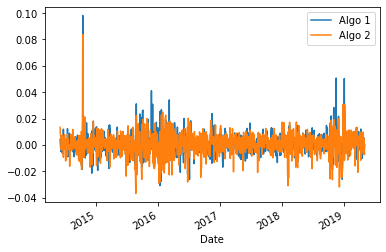

In [326]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.plot()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [327]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_data = Path("Resources/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(sp_tsx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
print(sp_tsx_df.head())

                 Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99


In [328]:
# Check Data Types
print(sp_tsx_df.dtypes['Close'])

object


In [329]:
# Fix Data Types
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(',', '').str.replace('$', '').astype(float)
sp_tsx_df.dtypes

C:\Users\jakek\AppData\Local\Temp/ipykernel_9572/146448529.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(',', '').str.replace('$', '').astype(float)


Close    float64
dtype: object

In [330]:
# Calculate Daily Returns
sp_tsx_df = sp_tsx_df.pct_change()
sp_tsx_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [331]:
# Drop nulls
sp_tsx_df.dropna(inplace=True)
sp_tsx_df

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [332]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_df.columns = ["S&P TSX"]
sp_tsx_df

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [333]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp_tsx_df], axis="columns", join="inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

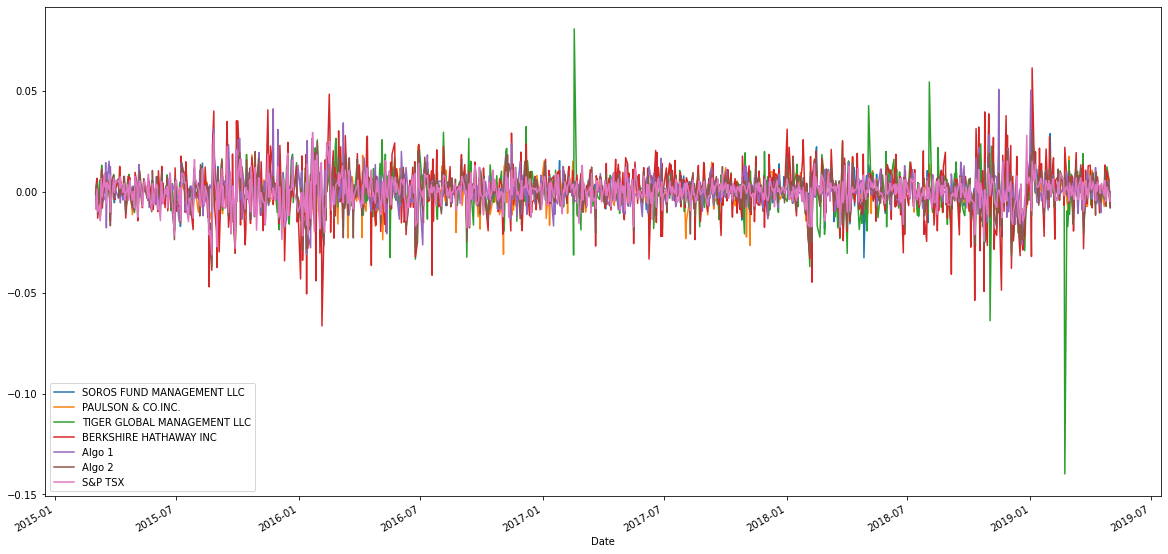

In [334]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

In [335]:
# Calculate cumulative returns of all portfolios
cum_return = (1 + combined_df).cumprod()
cum_return

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168
...,...,...,...,...,...,...,...
2019-04-25,1.118163,0.754821,0.840272,1.348932,2.011144,1.196390,1.070504
2019-04-26,1.127275,0.761736,0.850654,1.363007,2.017139,1.202677,1.072916
2019-04-29,1.128689,0.763808,0.855971,1.370126,2.027645,1.206080,1.072071


<AxesSubplot:xlabel='Date'>

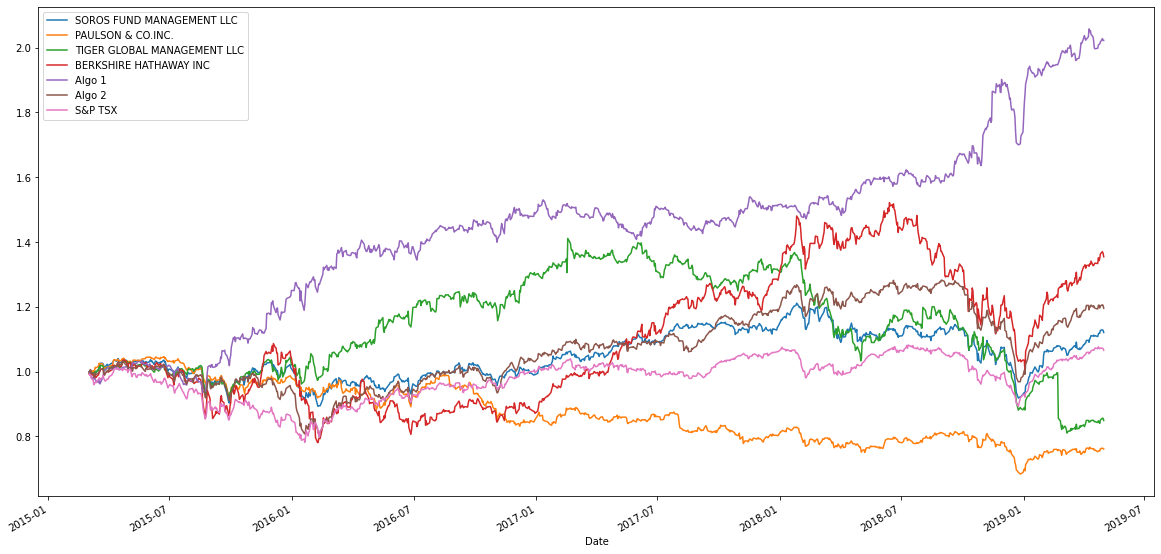

In [336]:
# Plot cumulative returns
cum_return.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

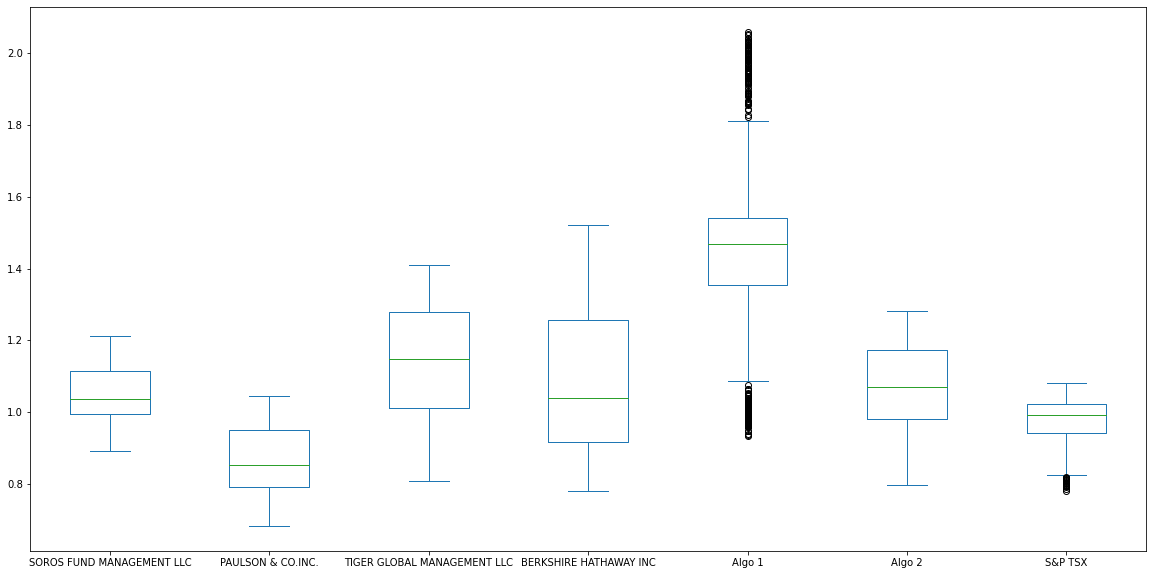

In [337]:
# Box plot to visually show risk
cum_return.plot(kind = 'box', figsize = (20,10))

### Calculate Standard Deviations

In [338]:
# Calculate the daily standard deviations of all portfolios
cum_return_std = combined_df.std()
cum_return_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [339]:
# Calculate  the daily standard deviation of S&P TSX 60
print(f"the daily standard deviation of S&P TSX is {cum_return_std['S&P TSX']}")

the daily standard deviation of S&P TSX is 0.007034167748577725


In [340]:
# Determine which portfolios are riskier than the S&P TSX 60
cum_return_std['S&P TSX'] < cum_return_std
print(f"The following portfolios with True statement are riskier than the S&P TSX: \n{cum_return_std['S&P TSX'] < cum_return_std}")

The following portfolios with True statement are riskier than the S&P TSX: 
SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P TSX                        False
dtype: bool


### Calculate the Annualized Standard Deviation

In [341]:
# Calculate the annualized standard deviation (252 trading days)
volatility = combined_df.std() * np.sqrt(252)
volatility

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

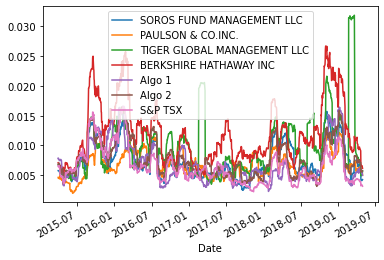

In [342]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_combined_21 = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
std_combined_21.plot()

### Calculate and plot the correlation

In [343]:
# Calculate the correlation
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

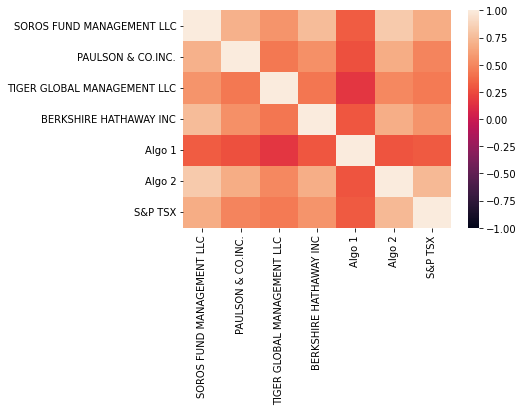

In [344]:
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [345]:
# Calculate covariance of a single portfolio
rolling_covariance = cum_return['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(cum_return['S&P TSX'])
rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000823
2019-04-26    0.000808
2019-04-29    0.000805
2019-04-30    0.000790
2019-05-01    0.000776
Length: 1029, dtype: float64

In [346]:
# Calculate variance of S&P TSX
rolling_variance = cum_return['S&P TSX'].rolling(window=60).var()
rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000393
2019-04-26    0.000384
2019-04-29    0.000375
2019-04-30    0.000359
2019-05-01    0.000345
Name: S&P TSX, Length: 1029, dtype: float64

In [347]:
# Computing beta
BRK_beta = rolling_covariance / rolling_variance
BRK_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    2.093721
2019-04-26    2.106440
2019-04-29    2.146894
2019-04-30    2.198289
2019-05-01    2.247773
Length: 1029, dtype: float64

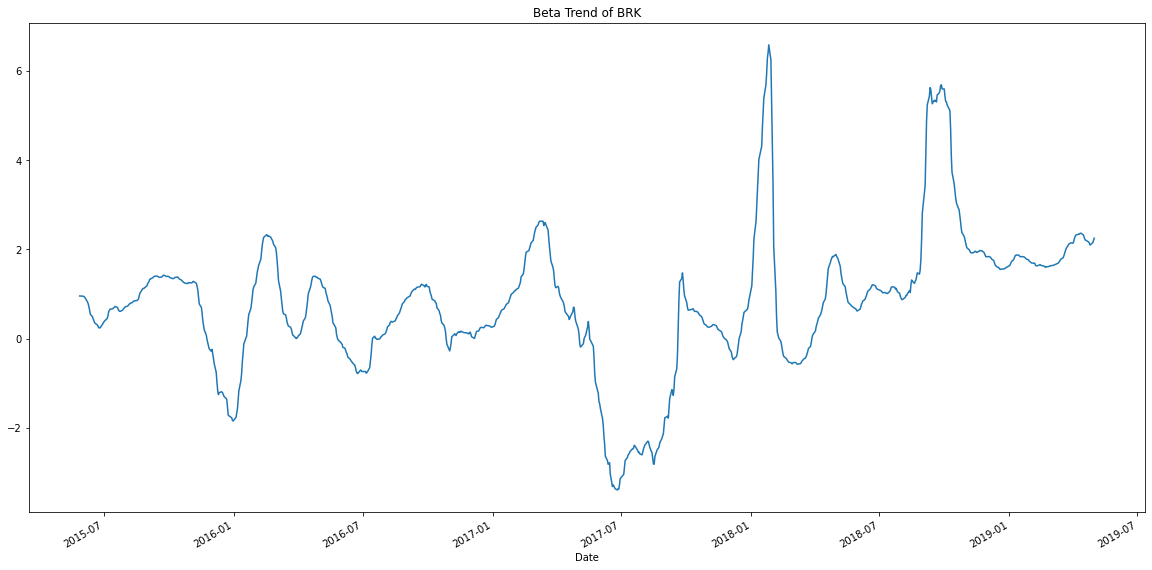

In [348]:
# Plot beta trend
ax = BRK_beta.plot(figsize=(20, 10), title='Beta Trend of BRK')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [349]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [350]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

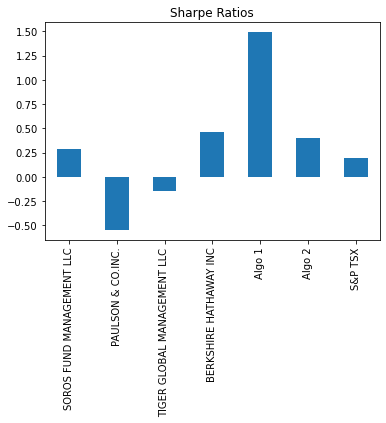

In [351]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Only Algorithmic 1 Strategy outperformed both the market and the whales portfolios. Algorithmic 2 Strategy has only outperformed the market. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [352]:
# Reading data from 1st stock
amd_data = Path("Resources/AMD_Price_History.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
amd_df = pd.read_csv(amd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
amd_df = amd_df.drop(columns=['Open', 'High', 'Low' , 'Volume'])
amd_df = amd_df.rename(columns={
    "Close" : "AMD_Close"})

# Display a few rows from one Dat1Frame
amd_df.head()

,AMD_Close
Date,
2018-12-04,21.12
2018-12-06,21.30
2018-12-07,19.46
2018-12-10,19.99
2018-12-11,19.98


In [353]:
# Reading data from 2nd stock
nvda_data = Path("Resources/NVDA_Price_History.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
nvda_df = pd.read_csv(nvda_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
nvda_df = nvda_df.drop(columns=['Open', 'High', 'Low' , 'Volume'])
nvda_df = nvda_df.rename(columns={
    "Close" : "NVDA_Close"})

# Display a few rows from one DataFrame
nvda_df.head()

,NVDA_Close
Date,
2018-12-04,39.28
2018-12-06,39.57
2018-12-07,36.90
2018-12-10,37.97
2018-12-11,37.05


In [354]:
# Reading data from 3rd stock
td_data = Path("Resources/TD_Price_History.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
td_df = pd.read_csv(td_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
td_df = td_df.drop(columns=['Open', 'High', 'Low' , 'Volume'])
td_df = td_df.rename(columns={
    "Close" : "TD_Close"})

# Display a few rows from one DataFrame
td_df.head()

,TD_Close
Date,
2018-12-04,54.19
2018-12-06,52.79
2018-12-07,52.49
2018-12-10,51.93
2018-12-11,51.86


In [355]:
# Combine all stocks in a single DataFrame
combined_df_2 = pd.concat([amd_df, nvda_df, td_df], axis="columns", join="inner")
combined_df_2

,AMD_Close,NVDA_Close,TD_Close
Date,,,
2018-12-04,21.12,39.28,54.19
2018-12-06,21.30,39.57,52.79
2018-12-07,19.46,36.90,52.49
2018-12-10,19.99,37.97,51.93
2018-12-11,19.98,37.05,51.86
...,...,...,...
2021-11-29,161.91,333.76,73.37
2021-11-30,158.37,326.76,72.06
2021-12-01,149.11,314.35,71.73


In [356]:
# Reset Date index


In [357]:
# Reorganize portfolio data by having a column per symbol


In [372]:
# Calculate daily returns
combined_df_2 = combined_df_2.pct_change()

# Drop NAs
combined_df_2.dropna(inplace=True)

# Display sample data
combined_df_2.head()

,AMD_Close,NVDA_Close,TD_Close
Date,,,
2018-12-10,-0.881888,-0.858991,-2.124744
2018-12-11,-0.225740,0.283852,-1.995802
2018-12-12,49.104718,-0.345979,6.039186
2018-12-13,-0.956693,-0.120968,-0.837393
2018-12-14,-0.517347,-57.872104,inf


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [359]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = combined_df_2.dot(weights)

# Display sample data
portfolio_returns

Date
2018-12-06   -0.003310
2018-12-07   -0.053181
2018-12-10    0.015188
2018-12-11   -0.008693
2018-12-12    0.012275
                ...   
2021-11-29    0.032491
2021-11-30   -0.020231
2021-12-01   -0.033676
2021-12-02    0.027520
2021-12-03   -0.033563
Length: 755, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [360]:
# Join your returns DataFrame to the original returns DataFrame
total_returns = pd.concat([combined_df, portfolio_returns], axis='columns', join='inner')
total_returns = total_returns.rename(columns={0: 'My Returns'})
total_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Returns
Date,,,,,,,,
2018-12-06,0.004427,-0.001312,-0.005373,0.007661,-0.006886,-0.003116,-0.016179,-0.003310
2018-12-07,-0.019902,-0.012730,-0.022698,-0.024372,0.003690,-0.015535,-0.009498,-0.053181
2018-12-10,-0.009854,-0.004736,-0.007709,-0.002190,-0.016156,-0.004270,-0.004518,0.015188
2018-12-11,-0.001686,-0.003164,0.000611,0.001262,-0.008391,-0.002542,-0.004104,-0.008693
2018-12-12,0.009128,0.008147,0.002798,0.017475,0.002048,0.006321,0.007856,0.012275


In [361]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
My Returns                     0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [362]:
# Calculate the annualized `std`
new_volatility = total_returns.std() * np.sqrt(252)
new_volatility.describe()

count    8.000000
mean     0.187252
std      0.092491
min      0.101946
25%      0.132061
50%      0.141230
75%      0.228748
max      0.370897
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21 Days STD'}, xlabel='Date'>

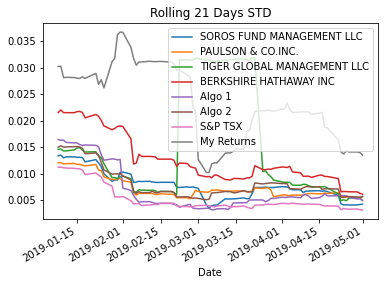

In [363]:
# Calculate rolling standard deviation
std_total_21 = total_returns.rolling(window=21).std()
# Plot rolling standard deviation
std_total_21.plot(title= 'Rolling 21 Days STD')

### Calculate and plot the correlation

In [364]:
# Calculate and plot the correlation
total_correlation = total_returns.corr()
total_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.800471,0.453355,0.807258,0.300425,0.854384,0.679266,0.690040
PAULSON & CO.INC.,0.800471,1.000000,0.376181,0.674152,0.389466,0.791130,0.493042,0.667953
TIGER GLOBAL MANAGEMENT LLC,0.453355,0.376181,1.000000,0.266871,0.133116,0.328080,0.352600,0.271684
BERKSHIRE HATHAWAY INC,0.807258,0.674152,0.266871,1.000000,0.225560,0.792472,0.648765,0.715092
Algo 1,0.300425,0.389466,0.133116,0.225560,1.000000,0.422629,0.272584,0.177434
Algo 2,0.854384,0.791130,0.328080,0.792472,0.422629,1.000000,0.693468,0.675337
S&P TSX,0.679266,0.493042,0.352600,0.648765,0.272584,0.693468,1.000000,0.444371
My Returns,0.690040,0.667953,0.271684,0.715092,0.177434,0.675337,0.444371,1.000000


<AxesSubplot:>

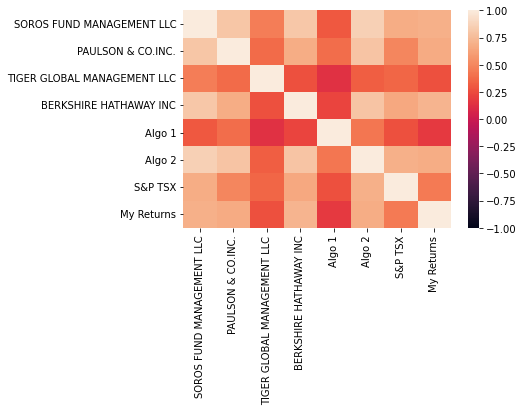

In [365]:
sns.heatmap(total_correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [366]:
# Calculate and plot Beta
custom_covariance = total_returns['My Returns'].rolling(window=60).cov(total_returns['S&P TSX'])
custom_covariance

my_beta = custom_covariance / rolling_variance
my_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.063211
2019-04-26    0.063387
2019-04-29    0.061020
2019-04-30    0.063720
2019-05-01    0.069321
Length: 1029, dtype: float64

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Returns'}, xlabel='Date'>

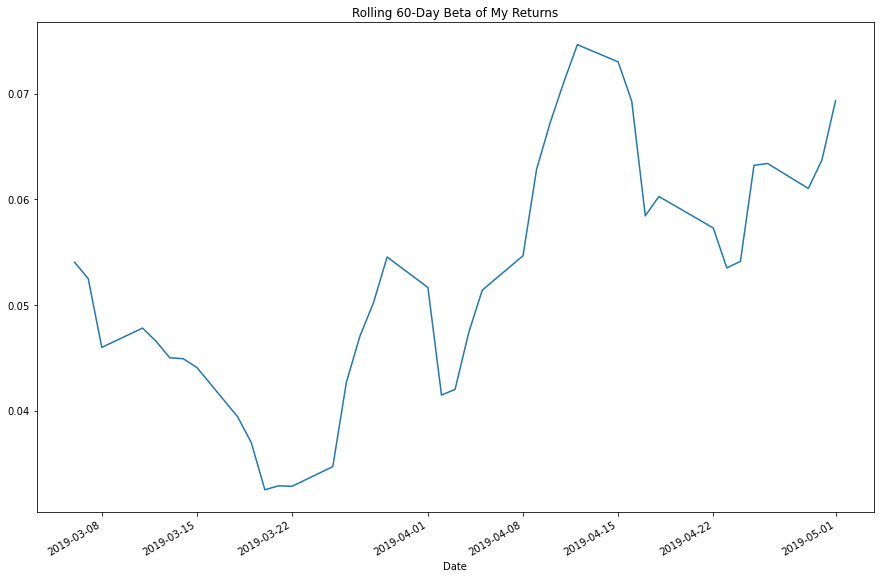

In [367]:
ay = my_beta.plot(figsize=(15,10), title="Rolling 60-Day Beta of My Returns")
ay

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [368]:
# Calculate Annualized Sharpe Ratios
new_sharpe_ratios = (total_returns.mean() * 252) / (total_returns.std() * np.sqrt(252))
new_sharpe_ratios

SOROS FUND MANAGEMENT LLC      1.323681
PAULSON & CO.INC.             -0.134456
TIGER GLOBAL MANAGEMENT LLC   -1.722709
BERKSHIRE HATHAWAY INC         1.667152
Algo 1                         1.309651
Algo 2                         1.099128
S&P TSX                        2.050961
My Returns                     0.934435
dtype: float64

<AxesSubplot:title={'center':'New Sharpe Ratios'}>

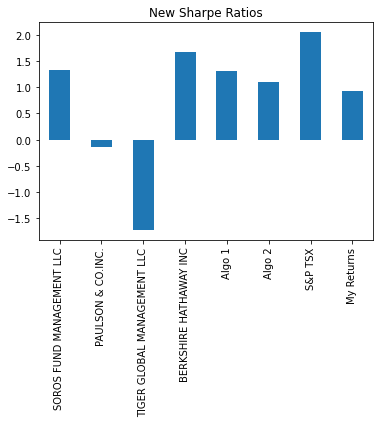

In [369]:
# Visualize the sharpe ratios as a bar plot
new_sharpe_ratios.plot.bar(title='New Sharpe Ratios')

### How does your portfolio do?

My portfolio has a very high standard deviation of 0.37, highest amongst all portfolios while least correlated with Algo 1 portfolio at 0.17 and most positively correlated with Berkshire Hathaway Inc. portfolio at 0.71. 
My portfolio's 60-day Rolling Beta averaged at 0.18 with standard deviation of 0.09, minimum of 0.1 and maximum of 0.37. 
My portfolio's Sharpe Ratio is 0.93, ranked 6th of 8 portfolios.

Conclusion: My portfolio is not a great portfolio as it is of greatest risk and one of the least profitable portfolio compared to other portfolios. 